In [1]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import SimpleITK as sitk
import tifffile as tif
import seaborn as sns
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe/")
from tools.analysis.transform_points import transform_points

In [4]:
basepath = "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet/output_dirs"

# SIGMA annotations 
sigma_ann_filename = os.path.join(basepath,"SIGMA_ann_in_PRA_25/result.tif")

#WHS annotations 
whs_ann_filename = os.path.join(basepath,"PMA_ann_in_PRA_25/PMA_ann_in_PRA.tif")


In [26]:
sigma =tif.imread(sigma_ann_filename)
whs = tif.imread(whs_ann_filename)

In [27]:
sigma_vals_to_use = [282, 312,382,392,402,281,311,381,391,401]

whs_vals_to_use = [1074,905,1114,233,601,649,281,1066,401,433,1046,441,312782592,312782624]

In [31]:
np.shape(sigma)

(618, 1150, 385)

In [35]:
sigma_bool = np.zeros(np.shape(sigma))
whs_bool = np.zeros(np.shape(whs))

In [43]:
sigma_bool[np.isin(sigma,sigma_vals_to_use)]=1
whs_bool[np.isin(whs,whs_vals_to_use)]=1

In [46]:
tif.imsave('/home/emilyjanedennis/Desktop/sigma_ppc_in_PRA.tif',sigma_bool)
tif.imsave('/home/emilyjanedennis/Desktop/whs_ppc_in_PRA.tif',whs_bool)

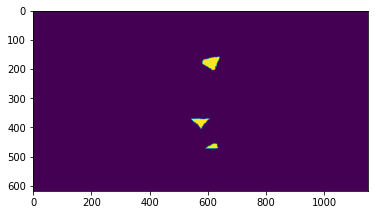

In [44]:
plt.imshow(whs_bool[:,:,60])
plt.show()